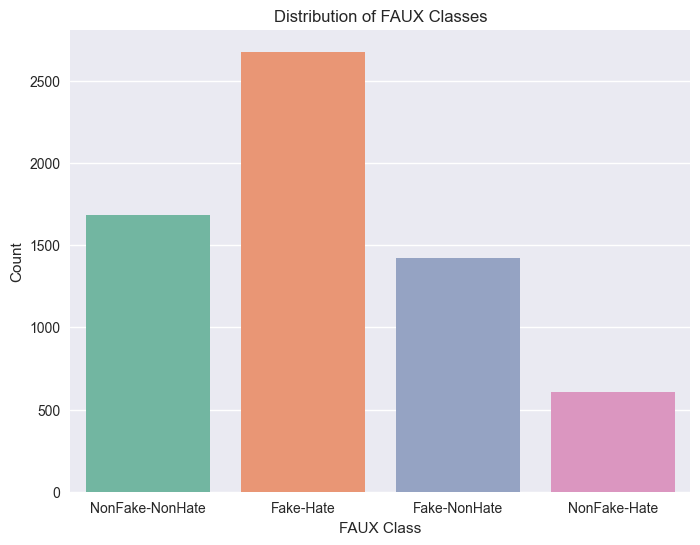

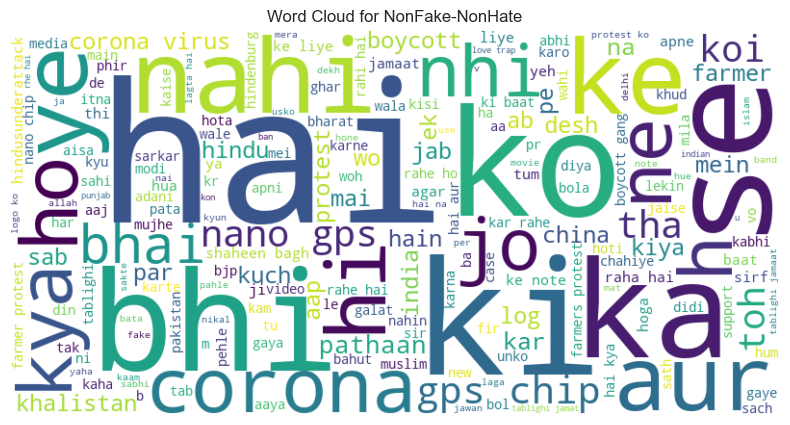

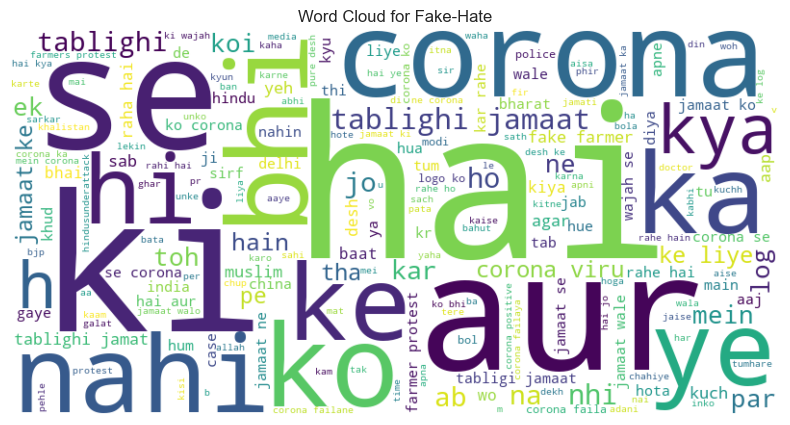

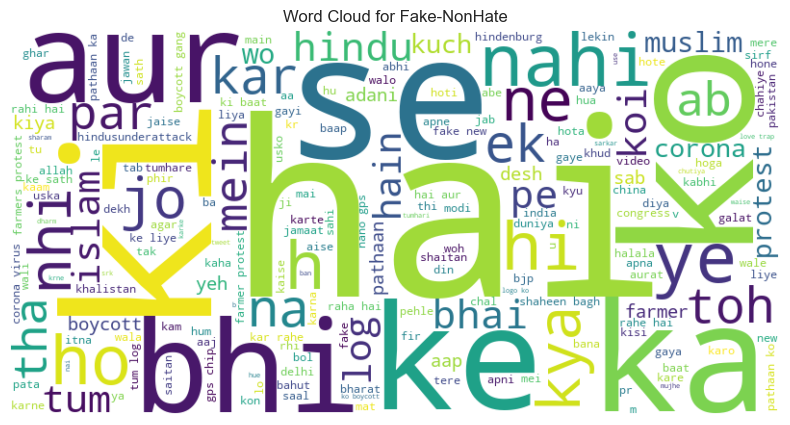

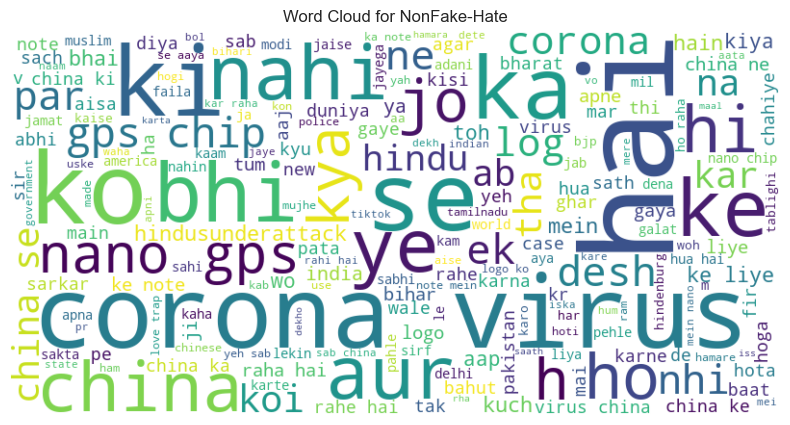

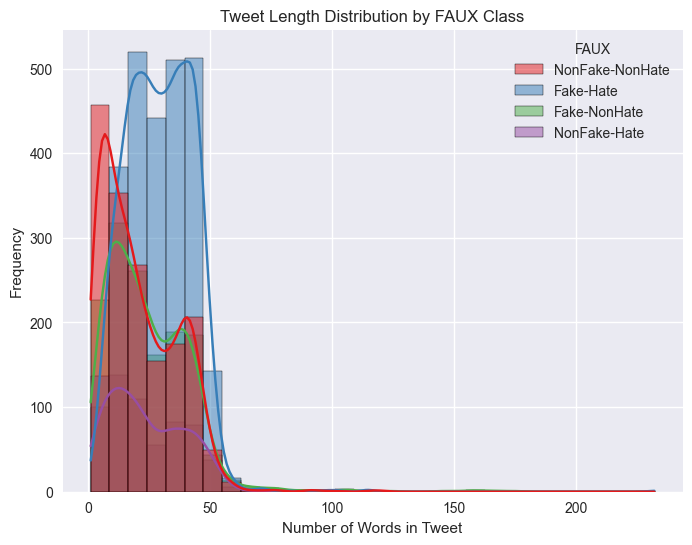

Total Number of Samples: 6388

Class Distribution:
Fake-Hate          2676
NonFake-NonHate    1683
Fake-NonHate       1421
NonFake-Hate        608
Name: FAUX, dtype: int64

Max Length of Tweets: 232 words
Min Length of Tweets: 1 words

Most Common Words by Class:
--------------------------------------------------

NonFake-NonHate:
hai: 1205
ki: 622
ke: 612
ko: 552
se: 513
ka: 431
me: 419
bhi: 412
to: 400
nahi: 369

Fake-Hate:
hai: 2598
corona: 2113
ke: 1489
ko: 1406
ki: 1406
jamaat: 1375
se: 1364
to: 1017
me: 958
aur: 938

Fake-NonHate:
hai: 1112
ki: 668
ko: 585
ke: 578
se: 457
ka: 449
to: 414
aur: 401
bhi: 393
me: 371

NonFake-Hate:
hai: 510
corona: 293
china: 293
se: 285
virus: 279
ke: 260
ko: 250
ki: 250
ka: 205
me: 184


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load your cleaned dataset
df = pd.read_csv("Data.csv")

# 1. Plot Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FAUX', data=df, palette="Set2")
plt.title("Distribution of FAUX Classes")
plt.xlabel("FAUX Class")
plt.ylabel("Count")
plt.show()

# 2. Generate Word Clouds for Each Class
for faux_class in df['FAUX'].unique():
    text = " ".join(tweet for tweet in df[df['FAUX'] == faux_class]['Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {faux_class}")
    plt.show()

# 3. Length Distribution of Tweets
df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Tweet_Length', hue='FAUX', bins=30, kde=True, palette="Set1")
plt.title("Tweet Length Distribution by FAUX Class")
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.show()

total_samples = len(df)
# Class distribution
class_distribution = df['FAUX'].value_counts()
# Max and Min Length of Tweets
df['Tweet_Length'] = df['Tweet'].apply(lambda x: len(x.split()))
max_length = df['Tweet_Length'].max()
min_length = df['Tweet_Length'].min()
# Display the statistics
print(f"Total Number of Samples: {total_samples}")
print("\nClass Distribution:")
print(class_distribution)
print(f"\nMax Length of Tweets: {max_length} words")
print(f"Min Length of Tweets: {min_length} words")

# Common Words Analysis
def get_common_words(text_series, n=10):
    words = ' '.join(text_series).lower().split()
    return Counter(words).most_common(n)

print("\nMost Common Words by Class:")
print("-" * 50)
for class_name in df['FAUX'].unique():
    print(f"\n{class_name}:")
    common_words = get_common_words(df[df['FAUX'] == class_name]['Tweet'])
    for word, count in common_words:
        print(f"{word}: {count}")
